# Lista de Exercícios 2
- Distribuição Normal e Gradiente Descendente
- Ianka Karúzia Rabelo de Oliveira - 365560

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
from sklearn import linear_model
import libs.stats as st

## 1 Criando dataset manualmente

In [3]:
# Array
# 0 1 3 4 5 1 2 3 4 7
#X1 = np.array([2, 7, 1, 3, 3, 2, 7, 4, 6, 3])
X1 = np.array([-1, 3, 3, 3, 5, 2, 2, 7, 5])

In [4]:
# Média
np.mean(X1)

3.2222222222222223

In [5]:
# Desvio Padrão
np.std(X1)

2.1487866228681907

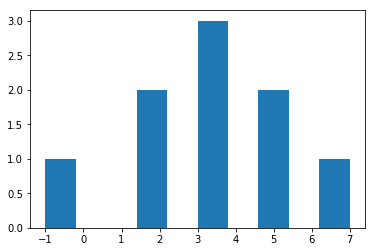

In [6]:
plt.hist(X1);

## 2 Distribuição Normal

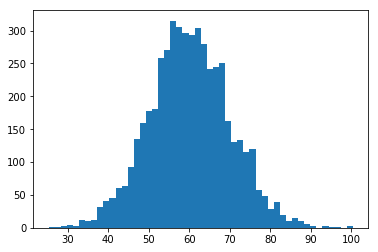

In [7]:
s = np.random.normal(loc=60, scale=10, size=5000)
plt.hist(s, bins=50);

## 3 Distribuições Gamma e Poisson

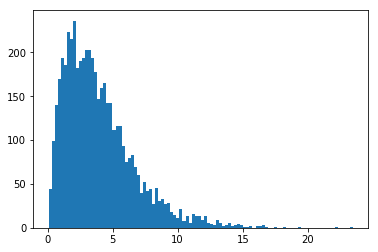

In [8]:
# Gamma
g = np.random.gamma(2, scale=2, size=5000)
plt.hist(g, bins=100);

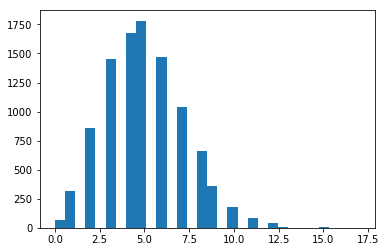

In [9]:
# Poisson
p = np.random.poisson(5, 10000)
plt.hist(p, bins=30);

## 4 Gradiente Descendente

In [10]:
# Função do Gradiente Descendente
def compute_error_for_line_given_points(b0, b1, x, y):
    totalError = np.sum((y - (b1 * x + b0)) ** 2)
    return totalError / float(len(y))

def step_gradient(b0_current, b1_current, x, y, learning_rate):
    N = float(len(y))
    b0_gradient = 2/N * np.sum(-(y - ((b1_current * x) + b0_current)))
    b1_gradient = 2/N * np.sum(-x * (y - ((b1_current * x) + b0_current)))
    new_b0 = b0_current - (learning_rate * b0_gradient)
    new_b1 = b1_current - (learning_rate * b1_gradient)
    return new_b0, new_b1

def gradient_descent_runner(x, y, b0, b1, learning_rate, num_iterations):
    for _ in range(num_iterations):
        b0, b1 = step_gradient(b0, b1, x, y, learning_rate)
    return b0, b1

def run(x, y, initial_b0, initial_b1, learning_rate, num_iterations):
    print("Inicia com b0 = {}, b1 = {}, error = {}".format(initial_b0, initial_b1, compute_error_for_line_given_points(initial_b0, initial_b1, x, y)))
    print("Executando...")
    b0, b1 = gradient_descent_runner(x, y, initial_b0, initial_b1, learning_rate, num_iterations)
    print("Após {} iterações, obtemos b0 = {}, b1 = {}, error = {}".format(num_iterations, b0, b1, compute_error_for_line_given_points(b0, b1, x, y)))

In [11]:
# Carregando os dados do dataset data.csv
points = np.genfromtxt("data.csv", delimiter=",")

#### Definindo os parâmetros e executando

In [12]:
%%time
x = points[:, 0]
y = points[:, 1]
learning_rate = 0.0001
initial_b0 = 0 # y_intercept inicial
initial_b1 = 0 # inclinação inicial
num_iterations = 400000 # Aumentado de 100000 para 400000
run(x,y, initial_b0, initial_b1, learning_rate, num_iterations)

Inicia com b0 = 0, b1 = 0, error = 5565.107834483214
Executando...
Após 400000 iterações, obtemos b0 = 7.6021214693278365, b1 = 1.3300747241890951, error = 110.2630933813352
Wall time: 6.7 s


#### Resultado usando o scikit learn

In [13]:
%%time
model = linear_model.LinearRegression()
X = [[i] for i in x]
model.fit(X, y)
b0, b1 = model.intercept_, model.coef_
y_pred = model.predict(X)
print("b0 = {}, b1 = {}, error = {}".format(b0, b1, compute_error_for_line_given_points(b0, b1, x, y)))

b0 = 7.991020982270399, b1 = [ 1.32243102], error = 110.25738346621316
Wall time: 313 ms


Aumentando o num_iterations para 400000 foi possivel diminuir a diferença dos erros para, aproximadamente, **0.005**

#### Aumentando o valor do learning_rate para 0.01

In [14]:
%%time
x = points[:, 0]
y = points[:, 1]
learning_rate = 0.01
initial_b0 = 0 # y_intercept inicial
initial_b1 = 0 # inclinação inicial
#num_iterations = 4000000
num_iterations = 140
run(x,y, initial_b0, initial_b1, learning_rate, num_iterations)

Inicia com b0 = 0, b1 = 0, error = 5565.107834483214
Executando...
Após 140 iterações, obtemos b0 = -7.764205023542097e+234, b1 = -3.9503054615858863e+236, error = inf
Wall time: 15.6 ms


C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in square
  This is separate from the ipykernel package so we can avoid doing imports until


Quando aumentado o valor do learning_rate de 0.0001 para 0.01, aparece em aviso durante a execução do algoritmo e os valores de b0, b1 e error não sao encontrados

## 5 Predição do valor da casa

In [15]:
# Criando o modelo linear
X = np.array([[1400], [1600], [1700], [1875], [1100], [1550], [2350], [2450], [1425], [1700]])
y = np.array([245000, 312000, 279000, 308000, 199000, 219000, 405000, 324000, 319000, 255000])

In [16]:
model = linear_model.LinearRegression()

In [17]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [18]:
%%time
b0, b1 = model.intercept_, model.coef_
y_pred = model.predict(X)
print("b0 = {}, b1 = {}, error = {}".format(b0, b1, compute_error_for_line_given_points(b0, b1, X, y)))

b0 = 98248.32962138078, b1 = [ 109.76773783], error = 51535434775.69203
Wall time: 0 ns


In [19]:
learning_rate = 0.0000000001
initial_b0 = 0 # y_intercept inicial
initial_b1 = 0 # inclinação inicial
num_iterations = 1000000
run(x,y, initial_b0, initial_b1, learning_rate, num_iterations)

ValueError: operands could not be broadcast together with shapes (10,) (100,) 

In [20]:
y_pred = model.predict(X)
y_pred

array([ 251923.16258352,  273876.71014954,  284853.48393255,
        304062.83805282,  218992.84123449,  268388.32325803,
        356202.51352211,  367179.28730512,  254667.35602927,
        284853.48393255])

In [21]:
y_test = model.predict(np.array([[1000]]))
y_test

array([ 208016.06745148])

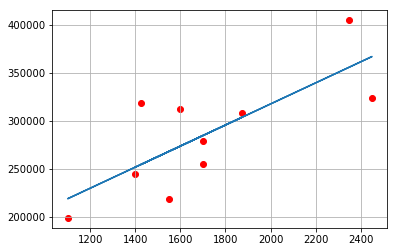

In [22]:
plt.grid()
plt.scatter(X, y, color='red')
plt.plot(X, y_pred)

Com base nas predições o valor da casa com 100m^2 seria de pouco menos que $199000

In [23]:
st.mean(X1)

3.2222222222222223

In [24]:
st.stdev(X1)

2.1487866228681907

In [25]:
np.var(X1)

4.617283950617284

In [26]:
st.var(X1)

4.617283950617284

In [27]:
from sklearn.metrics import mean_absolute_error
import numpy as np

In [28]:
y_true = np.array([3, -0.5, 2, 7])

In [29]:
y_pred = np.array([2.5, 0.0, 2, 8])

In [30]:
mean_absolute_error(y_true, y_pred)

0.5

In [33]:
import libs.metrics as mt

In [34]:
mt.mae(y_true, y_pred)

0.5